## The correlation between Bitcoin and the S&P 500 is higher in periods of economic crisis, is this true?

### Objective

The objective of this analysis is to explore the relationship and potential correlations between Bitcoin (BTC) and the S&P 500 index across different time periods, including major economic events like the COVID-19 pandemic. By leveraging historical price and volume data, this study aims to identify trends, measure volatility, and assess how these two markets interact under varying economic conditions.

Specifically, the analysis focuses on:
- Understanding the behavior of BTC and the S&P 500 during key economic periods.
- Comparing price and volume trends to identify potential patterns or anomalies.
- Highlighting insights that could inform investment or risk management strategies.

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')
btc_sp500_price_volume = pd.read_csv('./Data/btc_sp500_price_volume_merged.csv')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
btc_sp500_price_volume['Date'] = pd.to_datetime(btc_sp500_price_volume['Date'])

In [50]:
# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merge the datasets based on the Date column
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on="Date")

In [51]:
def analyze_period(data, start_date, end_date, title, line_color_BTC='orange', line_color_SP_500='blue'):
  """ 
  Parameters:
    - data: DataFrame with the combined data of BTC and S&P 500.
    - start_date: Start of the analysis period (str in 'YYYY-MM-DD' format).
    - end_date: End of the analysis period (str in 'YYYY-MM-DD' format).
    - title: Title for the charts.
    - line_color: Color for the Bitcoin line in the charts (str).
    
  Returns:
    - Calculated correlation (float).
  """
  # Filter data by date range
  period_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
  
  # Calculate Correlation
  correlation = period_data[['BTC_Price', 'SP500_Price']].corr().iloc[0, 1] # this use the Pearson correlation 
  print(f"The correlation between Bitcoin and S&P 500 during {title} is: {correlation:.4f}\n\n")
  
  # Set Graphic styles
  sns.set_theme(style='whitegrid')
  plt.figure(figsize=(14, 8))
  
  # Graphic for the temporal series
  plt.subplot(2, 1, 1)
  plt.plot(period_data['Date'], period_data['BTC_Price'], label='Bitcoin', color=line_color_BTC, alpha=0.8)
  plt.plot(period_data['Date'], period_data['SP500_Price'], label='S&P 500', color=line_color_SP_500, alpha=0.8)
  plt.title(f"Bitcoin vs S&P 500 Prices ({title})", fontsize=14)
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  
  # Scatter plot with regression line 
  plt.subplot(2, 1, 2)  
  sns.regplot(
    x='BTC_Price',
    y='SP500_Price',
    data=period_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'alpha': 0.6}
  )
  plt.title(f"Correlation Between Bitcoin and S&P 500 ({title})", fontsize=14)
  plt.xlabel('Bitcoin Price')
  plt.ylabel('S&P 500 Price')
  
  # Adjust design and show
  plt.tight_layout()
  plt.show()
  
  return correlation
  

### Price correlation between Bitcoin and the S&P 500 during periods of economic crisis? (2020-01 to 2021-12)

#### Understanding Correlations

1. **Positive Correlation**:
   - If the correlation is closer to **1**, it indicates a **direct positive correlation**, meaning that as one variable increases, the other also increases.

2. **Negative Correlation**:
   - If the correlation is closer to **-1**, it indicates a **direct inverse correlation**, meaning that as one variable increases, the other decreases.

3. **No Correlation**:
   - The closer the correlation is to **0**, the weaker the relationship, indicating **little to no correlation** between the two variables.


The correlation between Bitcoin and S&P 500 during COVID-19 Crisis (2020-2021) is: 0.8779




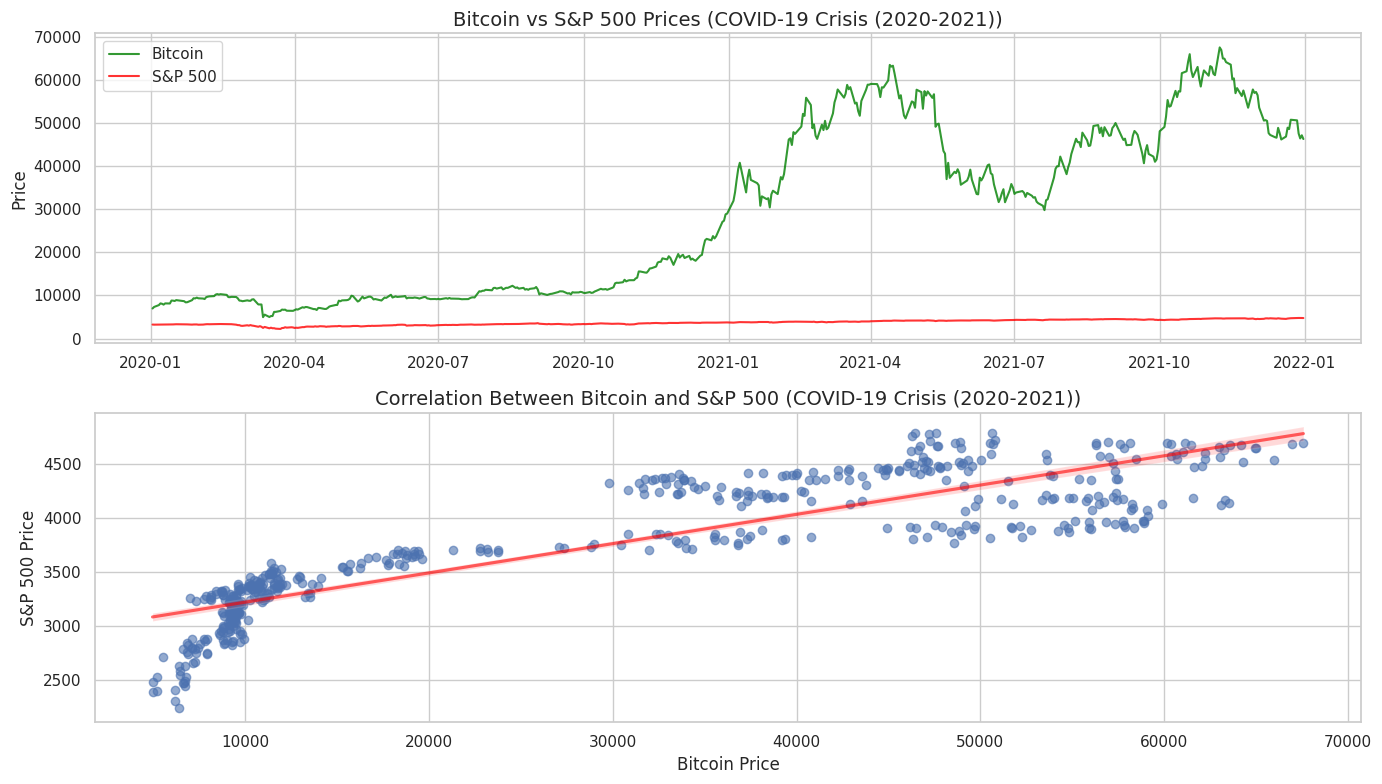

In [52]:
covid_correlation = analyze_period(
    merged_data, 
    '2020-01-01', 
    '2021-12-31', 
    'COVID-19 Crisis (2020-2021)', 
    line_color_BTC='green',
    line_color_SP_500='red'
)

### Price correlation with BTC and S&P 500 during Supply and energy Crisis 2021-2022 (Still covid issues and Ukraine-Russia War)

#### Understanding Correlations

1. **Positive Correlation**:
   - If the correlation is closer to **1**, it indicates a **direct positive correlation**, meaning that as one variable increases, the other also increases.

2. **Negative Correlation**:
   - If the correlation is closer to **-1**, it indicates a **direct inverse correlation**, meaning that as one variable increases, the other decreases.

3. **No Correlation**:
   - The closer the correlation is to **0**, the weaker the relationship, indicating **little to no correlation** between the two variables.


The correlation between Bitcoin and S&P 500 during Supply and Energy Crisis (2021-2022) is: 0.6018




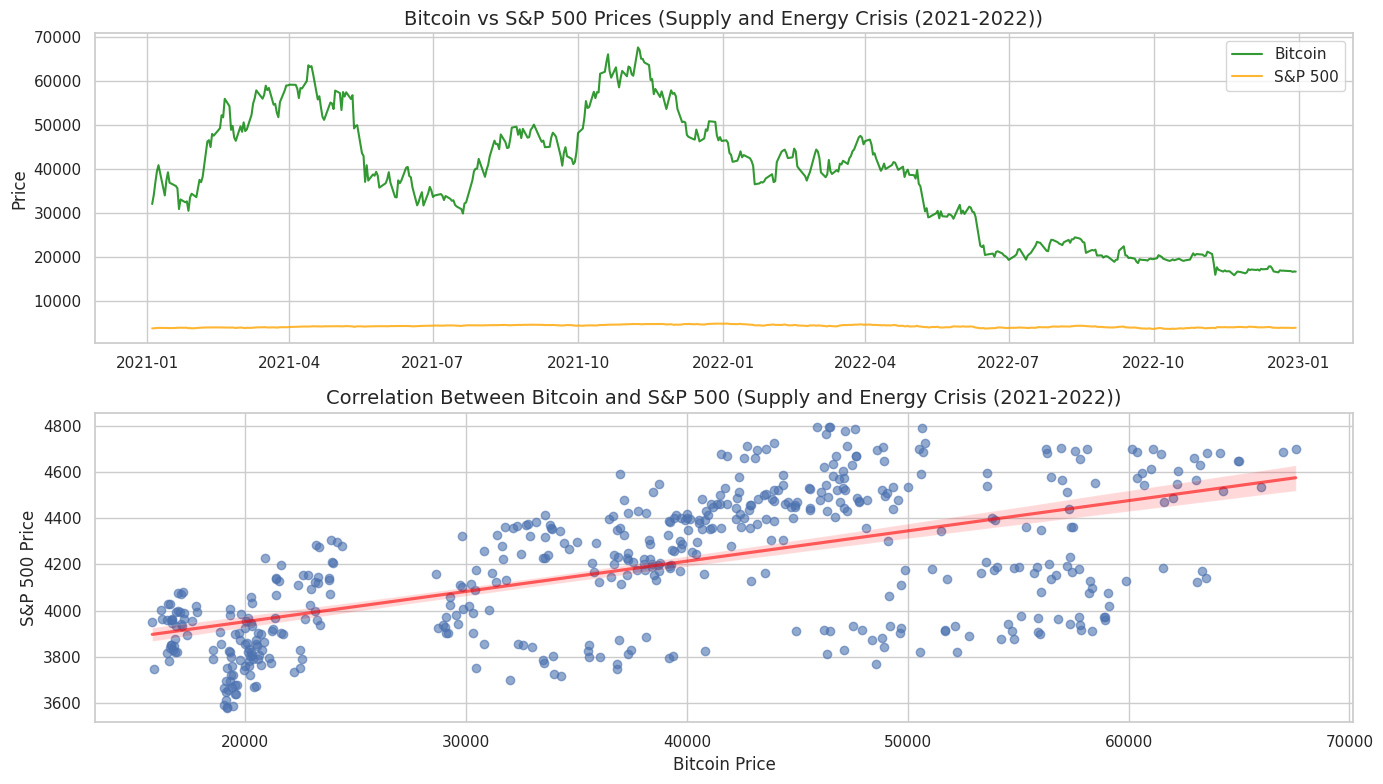

In [53]:
supply_crisis_correlation = analyze_period(
    merged_data, 
    '2021-01-01', 
    '2022-12-31', 
    'Supply and Energy Crisis (2021-2022)', 
    line_color_BTC='green',
    line_color_SP_500='orange'
)

### Price correlation with BTC and S&P 500, economic crisis 2023-2024

#### Understanding Correlations

1. **Positive Correlation**:
   - If the correlation is closer to **1**, it indicates a **direct positive correlation**, meaning that as one variable increases, the other also increases.

2. **Negative Correlation**:
   - If the correlation is closer to **-1**, it indicates a **direct inverse correlation**, meaning that as one variable increases, the other decreases.

3. **No Correlation**:
   - The closer the correlation is to **0**, the weaker the relationship, indicating **little to no correlation** between the two variables.


The correlation between Bitcoin and S&P 500 during Economic Crisis (2023-2024) is: 0.9076




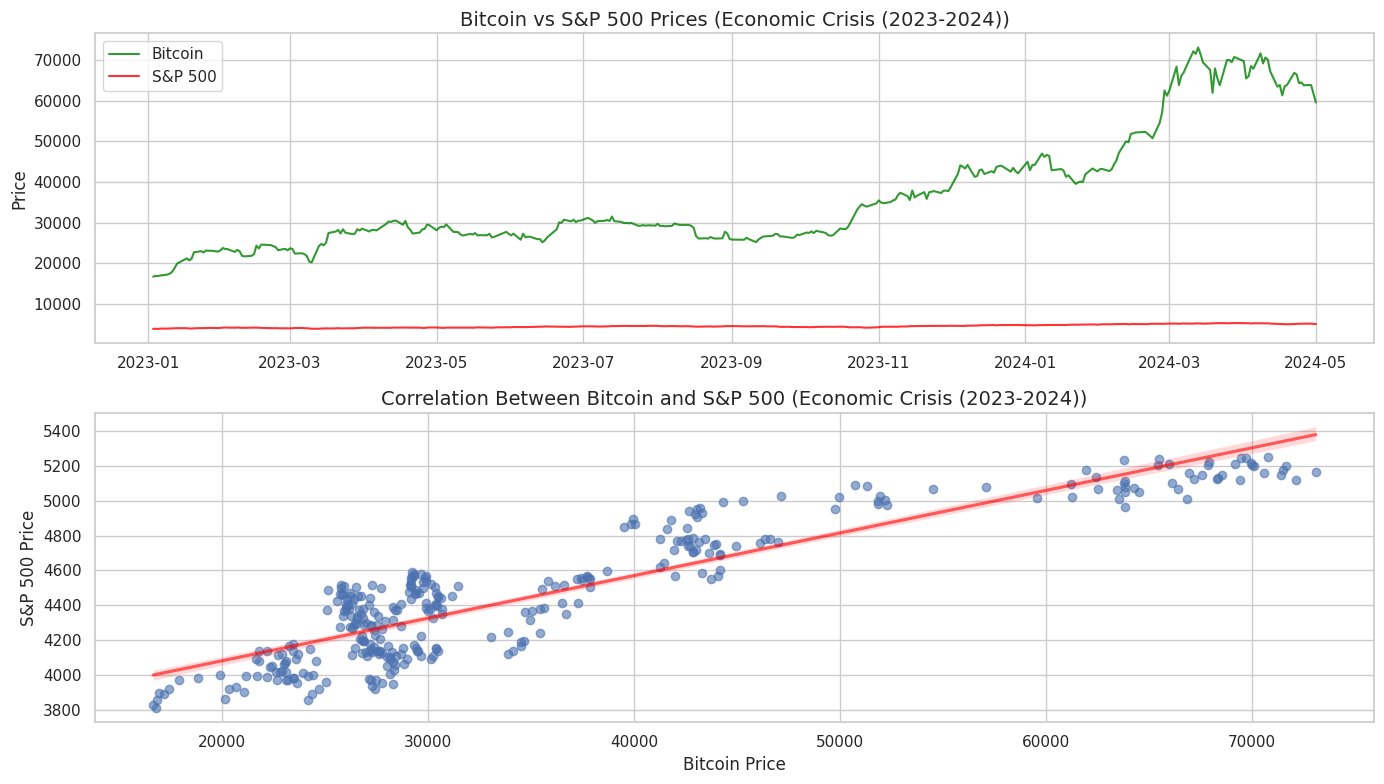

In [54]:
economic_crisis_correlation = analyze_period(
    merged_data, 
    '2023-01-01', 
    '2024-05-01', 
    'Economic Crisis (2023-2024)',
    line_color_BTC='green',
    line_color_SP_500='red'
)

Table of Price correlations between the different periods of time

In [55]:
results = pd.DataFrame({
    'Period': ['COVID-19 Crisis', 'Supply and Energy Crisis', 'Economic Crisis'],
    'Correlation': [covid_correlation, supply_crisis_correlation, economic_crisis_correlation]
})
print(results)


                     Period  Correlation
0           COVID-19 Crisis     0.877928
1  Supply and Energy Crisis     0.601778
2           Economic Crisis     0.907637


### Table of Volume correlations: BTC volumen vs S&P 500 and viceversa

#### Understanding Correlations

1. **Positive Correlation**:
   - If the correlation is closer to **1**, it indicates a **direct positive correlation**, meaning that as one variable increases, the other also increases.

2. **Negative Correlation**:
   - If the correlation is closer to **-1**, it indicates a **direct inverse correlation**, meaning that as one variable increases, the other decreases.

3. **No Correlation**:
   - The closer the correlation is to **0**, the weaker the relationship, indicating **little to no correlation** between the two variables.


In [56]:
# Calculate General Correlations

btc_volume_sp500_price_corr = btc_sp500_price_volume[['BTC_Volume', 'SP500_Price']].corr().iloc[0, 1]
sp500_volume_btc_price_corr = btc_sp500_price_volume[['SP500_Volume', 'BTC_Price']].corr().iloc[0, 1]

# Define the crisis periods
crisis_periods = {
    "COVID-19 Crisis": ("2020-03-01", "2021-12-31"),
    "Supply and Energy Crisis": ("2021-01-01", "2022-12-31"),
    "Economic Crisis 2023-2024": ("2023-01-01", "2024-05-01")
}

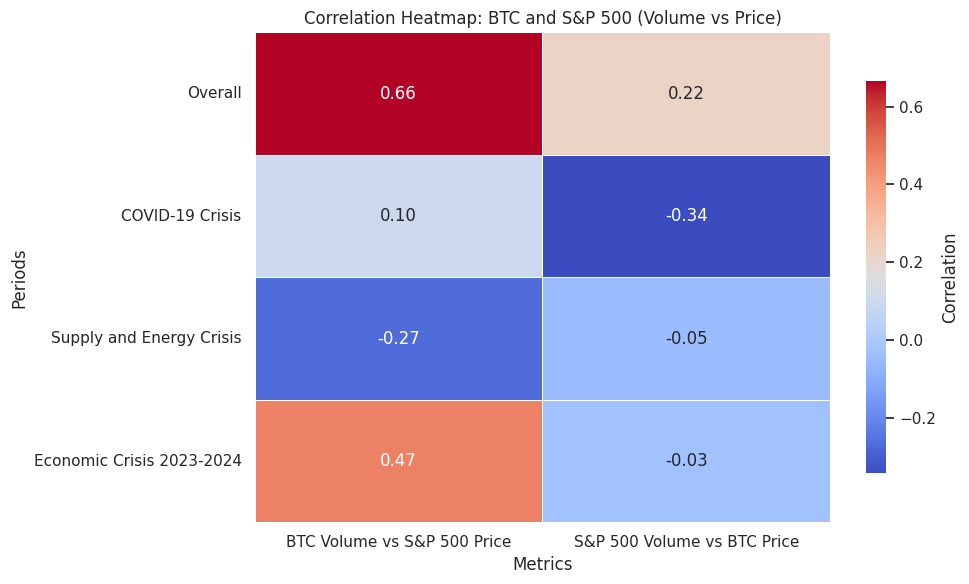

In [57]:
# Calculate correlations for all the crisis periods
period_volume_price_correlations = []

for period_name, (start_date, end_date) in crisis_periods.items():
  filtered_data = btc_sp500_price_volume[(btc_sp500_price_volume['Date'] >= start_date) & (btc_sp500_price_volume['Date'] <= end_date)]
  if not filtered_data.empty:
    btc_volume_sp500_price = filtered_data[['BTC_Volume', 'SP500_Price']].corr().iloc[0, 1]
    sp500_volume_btc_price = filtered_data[['SP500_Volume', 'BTC_Price']].corr().iloc[0, 1]
    period_volume_price_correlations.append({
      "Period": period_name,
      "BTC Volume vs S&P 500 Price": btc_volume_sp500_price,
      "S&P 500 Volume vs BTC Price": sp500_volume_btc_price
    })
    
# Merge the general correlations with the crisis periods
correlation_volume_price_df = pd.DataFrame([{
  "Period": "Overall",
  "BTC Volume vs S&P 500 Price": btc_volume_sp500_price_corr,
  "S&P 500 Volume vs BTC Price": sp500_volume_btc_price_corr
}] + period_volume_price_correlations)

# Set the Period as the index for better visualization
correlation_volume_price_df.set_index("Period", inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
  correlation_volume_price_df, 
  annot=True, 
  cmap="coolwarm", 
  fmt=".2f", 
  linewidths=0.5, 
  cbar_kws={"shrink": 0.8, "label": "Correlation"}
)
plt.title('Correlation Heatmap: BTC and S&P 500 (Volume vs Price)')
plt.xlabel('Metrics')
plt.ylabel('Periods')
plt.tight_layout()
plt.show()

Generating CSV files for presentation in Power BI/Tableau

In [58]:
correlation_results = pd.DataFrame({
  'Period': ['Covid-19 Crisis', 'Supply and Energy Crisis', 'Economic Crisis'],
  'Start Date': ['2020-01-01', '2021-01-01', '2023-01-01'],
  'End Date': ['2021-12-31', '2022-12-31', '2024-05-01'],
  'Correlation': [covid_correlation, supply_crisis_correlation, economic_crisis_correlation]
})

# Check that dataframe is ok
correlation_results

# Save the results as CSV file
correlation_results.to_csv('./Data/correlation_results.csv', index=False)

### Observations and Conclusions

1. **Overall Trends**:
   - BTC and the S&P 500 exhibit distinct behaviors, with BTC showing higher volatility compared to the relatively stable movement of the S&P 500.
   - Both assets demonstrate significant price movements during economically impactful periods, such as the COVID-19 crisis.

2. **COVID-19 Period Analysis (2020-2021)**:
   - During the COVID-19 pandemic, BTC showed a sharp increase in price starting end-2020, which coincided with major fiscal stimulus measures globally.
   - The S&P 500 also rebounded during this period, indicating a correlation in recovery trends between traditional and cryptocurrency markets.

3. **Volume Analysis**:
   - BTC trading volume spiked significantly during periods of high price volatility, highlighting its sensitivity to market events.
   - S&P 500 volumes, while less volatile, show distinct increases during market uncertainty.

4. **Correlation Insights**:
   - **BTC Volume vs. S&P 500 Price**: The analysis shows a moderate-to-strong correlation overall (`0.66`), suggesting that increases in BTC trading volume tend to align with increases in the S&P 500 price. This indicates a potential interdependence during key periods.
   - **S&P 500 Volume vs. BTC Price**: The correlation is weak to negligible (`0.22` overall), implying that changes in S&P 500 trading volume have little to no consistent effect on BTC price movements.
   - **Note**: The observed correlations **should not be interpreted as direct causal relationships.** Further analysis would be required to explore whether external factors or specific events drive these trends. 

5. **Key Insights**:
   - BTC's high volatility presents both opportunities and risks, making it an asset for **speculative investors.**
   - The S&P 500's trends remain a key indicator of **traditional economic stability**, with its movements often reflecting broader macroeconomic conditions.

6. **So, The correlation between Bitcoin and the S&P 500 is higher in periods of economic crisis?**
   - Yes! it seems that the correlation between Bitcoin and the S&P 500 appears to be high, especially during times of economic crises.

---

This analysis highlights the interplay between cryptocurrency markets and traditional financial markets, providing valuable insights into how these two asset classes respond to global events. The findings also suggest that BTC trading activity might serve as a leading indicator for broader market sentiment, while the S&P 500's trading activity appears less impactful on BTC prices. Future research could explore additional variables, such as inflation or interest rates, to further uncover these relationships.
